<a href="https://colab.research.google.com/github/khodjasCode/deep_learning/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import fastai
fastai.__version__

'2.7.18'

In [3]:
torch.__version__

'2.5.1+cu121'

In [4]:
from fastai.vision.all import *
from ipywidgets import widgets

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 133MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.167011,0.029776,0.010149,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.049752,0.029974,0.009472,00:45
1,0.021591,0.013773,0.006089,00:46


In [6]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is it cat?: True
Probability: 1.000


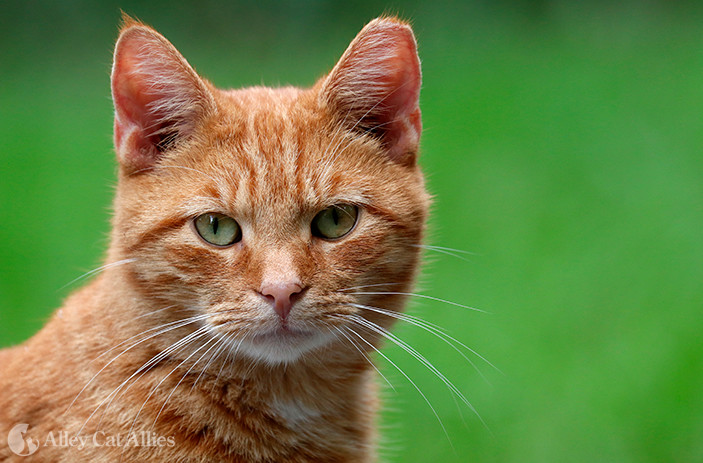

In [10]:
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)
print(f'Is it cat?: {pred}')
print(f'Probability: {prob[1].item():.3f}')
img

DL2

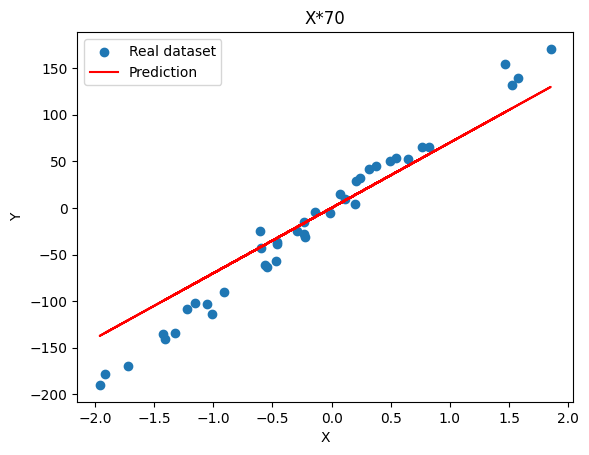

In [12]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

data = make_regression(n_samples = 40, n_features=1, noise = 10, random_state = 42)
x_data, y_data = data[0], data[1]

def classic_program(x): return x*70
y_pred = [classic_program(x) for x in x_data]

plt.scatter(x_data, y_data, label = 'Real dataset')
plt.plot(x_data, y_pred, 'r', label = 'Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('X*70')
plt.show()

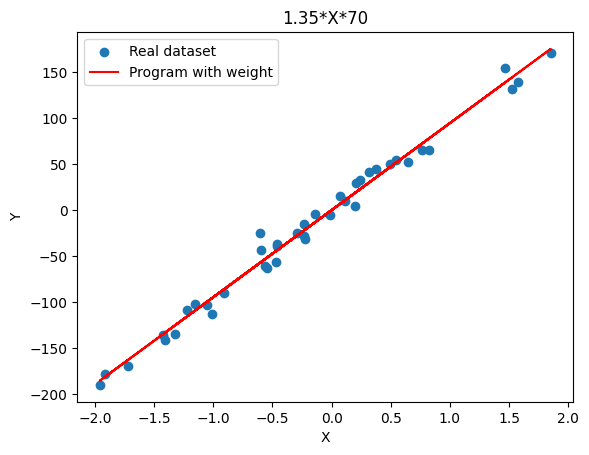

In [16]:
def weight_assigned_program(x, w): return w*x*70
w = 1.35
y_pred = [weight_assigned_program(x, w) for x in x_data]

plt.scatter(x_data, y_data, label = 'Real dataset')
plt.plot(x_data, y_pred, 'r', label = 'Program with weight')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'{w}*X*70')
plt.show()

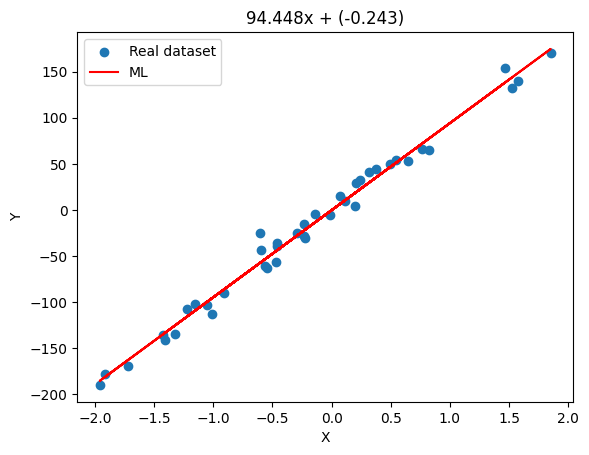

In [19]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

data = make_regression(n_samples = 40, n_features=1, noise = 10, random_state = 42)
x_data, y_data = data[0], data[1]

regression = LinearRegression().fit(x_data, y_data)
y_pred = regression.predict(x_data)

plt.scatter(x_data, y_data, label = 'Real dataset')
plt.plot(x_data, y_pred, 'r', label = 'ML')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'{regression.coef_[0]:.3f}x + ({regression.intercept_:.3f})')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


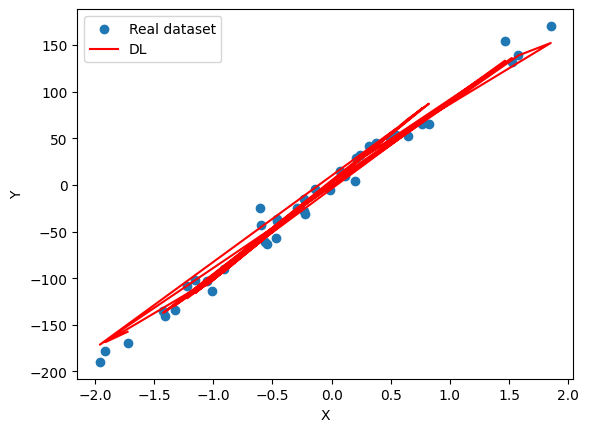

In [20]:
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

data = make_regression(n_samples = 40, n_features=1, noise = 10, random_state = 42)
x_data, y_data = data[0], data[1]

regression = MLPRegressor(max_iter=2000).fit(x_data, y_data)
y_pred = regression.predict(x_data)

plt.scatter(x_data, y_data, label = 'Real dataset')
plt.plot(x_data, y_pred, 'r', label = 'DL')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()